Problem statement 4:
Perform the following operations using Python
1. Scan all numeric variables for outliers. If there are outliers, use the following techniques to
deal with them. a)min max normalization b)z-score normalization c)Box plot


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("StudentPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [3]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [4]:
data.describe()

,math score,reading score,writing score
count,990.000000,985.000000,989.000000
mean,66.208081,69.261929,68.142568
std,15.103724,14.634171,15.199780
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
data.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [6]:
scores = ['math score' , 'reading score' , 'writing score']
for score in scores:
    data[score].fillna(data[score].mean() , inplace = True)

In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
data['gender'].unique()

array(['female', 'male', 'f'], dtype=object)

In [9]:
data['gender'].replace('f' , 'female' , inplace = True)
data["gender"].unique()

array(['female', 'male'], dtype=object)

In [10]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

<AxesSubplot: >

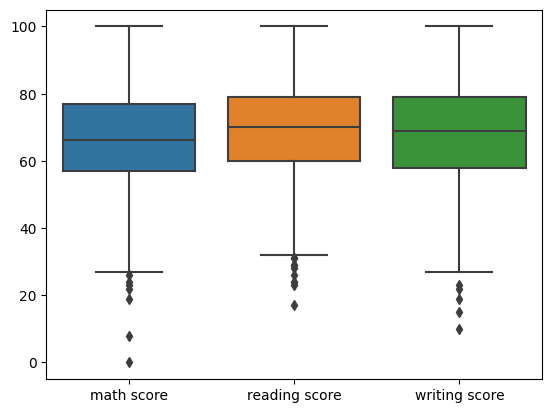

In [11]:
sns.boxplot(data = data[['math score' , 'reading score' , 'writing score']])

In [12]:
#calculating IQR for math score
Q1_math = data['math score'].quantile(0.25);
Q3_math = data['math score'].quantile(0.75)
IQR_math = Q3_math - Q1_math

print(IQR_math) 

20.0


In [13]:
Q1_reading = data['reading score'].quantile(0.25);
Q3_reading = data['reading score'].quantile(0.75)
IQR_reading = Q3_reading - Q1_reading

print(IQR_reading)

19.0


In [14]:
Q1_writing = data['writing score'].quantile(0.25);
Q3_writing = data['writing score'].quantile(0.75)
IQR_writing = Q3_writing - Q1_writing

print(IQR_writing) 

21.0


In [15]:
#calcualting high and low for all three score and defining boundary for oultiers to exist
low_math=Q1_math-1.5*IQR_math
high_math=Q3_math+1.5*IQR_math

low_reading=Q1_reading-1.5*IQR_reading
high_reading=Q3_reading+1.5*IQR_reading

low_writing=Q1_writing-1.5*IQR_writing
high_writing=Q3_writing+1.5*IQR_writing

In [16]:
#filtering out the outliers as per Interquartile range
outliers_math = data[(data['math score'] < low_math) | (data['math score'] > high_math)]
outliers_reading = data[(data['reading score'] < low_reading) | (data['reading score'] > high_reading)]
outliers_writing = data[(data['writing score'] < low_writing) | (data['writing score'] > high_writing)]

In [17]:
#filtering the data and removing outliers
data_filtered = data[~data.index.isin(outliers_math.index)]
data_filtered2 = data_filtered[~data_filtered.index.isin(outliers_reading.index)]
data_filtered_final = data_filtered2[~data_filtered2.index.isin(outliers_writing.index)]

<AxesSubplot: >

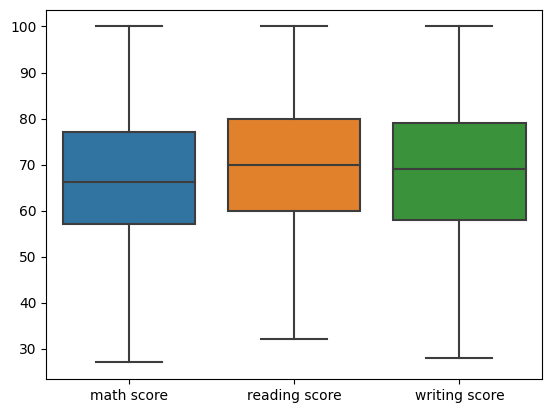

In [18]:
#This shows that outliers are removed
sns.boxplot(data_filtered_final)